# _`EDA`_

Import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

Load the data

In [2]:
data = pd.read_csv('_src/data/movies_transformed.csv')

We describe to get a brief summarize of the data

In [3]:
data.describe()

,id,popularity,release_year,runtime,vote_average,vote_count,budget,revenue,return
count,45451.000000,45451.000000,45451.000000,45205.000000,45451.000000,45451.000000,4.545100e+04,4.545100e+04,1.094200e+04
mean,107984.599745,2.926887,1991.882027,94.181905,5.624085,109.989703,4.231294e+06,1.111071e+07,2.162755e+06
std,112111.336735,6.006458,24.057726,38.329504,1.915424,491.352336,1.742942e+07,6.381606e+07,1.131492e+07
min,2.000000,0.000000,1874.000000,0.000000,0.000000,0.000000,0.000000e+00,-2.147484e+09,-9.060000e+00
25%,26367.500000,0.389095,1978.000000,85.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,59871.000000,1.131386,2001.000000,95.000000,6.000000,10.000000,0.000000e+00,0.000000e+00,1.265000e+00
75%,156327.500000,3.694370,2010.000000,107.000000,6.800000,34.000000,0.000000e+00,0.000000e+00,7.107500e+00
max,469172.000000,547.488298,2020.000000,1256.000000,10.000000,14075.000000,3.800000e+08,2.068224e+09,3.552983e+08


Make a wordcloud to see which are those genres that are the most in the movies 

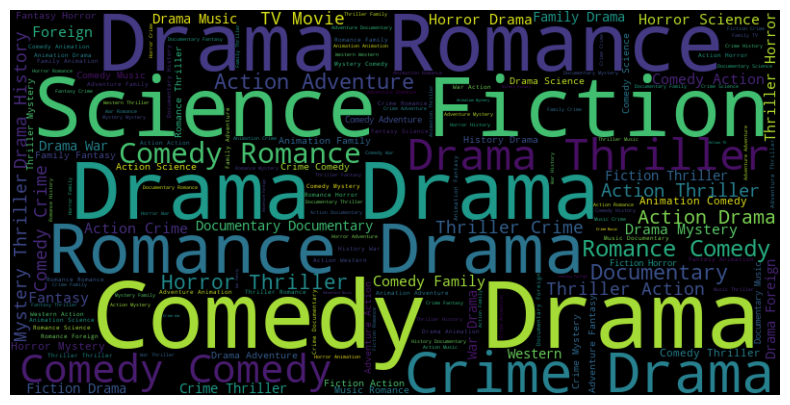

In [4]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['genres_list'].fillna('')))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
data.columns

Index(['collection_name', 'directors', 'genres_list', 'id', 'title',
       'prod_companies', 'prod_countries', 'original_language', 'overview',
       'popularity', 'release_date', 'release_year', 'runtime', 'status',
       'tagline', 'vote_average', 'vote_count', 'budget', 'revenue', 'return'],
      dtype='object')

### Separate the original data with a EDA data, like this we do not lose the original one

The columns that we are going to use will be directors, genres_list,prod_companies, popularity, vote_average and vote_count

In [6]:
eda_data = data[['id','title','directors','genres_list','prod_companies','popularity','vote_average','vote_count']].copy()

###  Later on we are going to watch the correlations between the features, to do this we need to have each data as a numerical value. That is what we are going to do now

But before lets input some missing values in the categorical features

In [7]:
fill_values = {'directors': '', 'prod_companies': '', 'genres_list': ''}
eda_data.fillna(fill_values, inplace=True)

Get the directors,genres and prod_companies to then make a dictionary of data:enconding

In [8]:
#Function to get the elements of the feature
elements = []
def get_elements(elements_str):
    if type(elements_str) == str:
        elements_list = elements_str.split(',')
        for element in elements_list:
            if element not in elements: elements.append(element)

In [9]:
#Directors 
elements = []
eda_data['directors'].apply(get_elements)
directors_dict = {}
for i, director in enumerate(elements):
    directors_dict[director] = i

#Genres
elements = []
eda_data['genres_list'].apply(get_elements)
genres_dict = {}
for i, genre in enumerate(elements):
    genres_dict[genre] = i     

#Prod Companies
elements = []
eda_data['prod_companies'].apply(get_elements)
company_dict = {}
for i, company in enumerate(elements):
    company_dict[company] = i


Get the first director and prod_companies that we are going to use for our analysis

In [10]:
def get_first(element_str):
    if type(element_str) == str:
        element_list = element_str.split(',')
        return element_list[0]

def get_second(element_str):
    if type(element_str) == str:
        element_list = element_str.split(',')
        if len(element_list) >= 2: return element_list[1]
        else: return None

def get_third(element_str):
    if type(element_str) == str:
        element_list = element_str.split(',')
        if len(element_list) >= 3: return element_list[2]
        else: return None   

In [11]:
eda_data['director'] = data['directors'].apply(get_first)
eda_data['prod_company'] = data['prod_companies'].apply(get_first)

And we take 3 genres 

In [12]:
eda_data['genre_1'] = data['genres_list'].apply(get_first)
eda_data['genre_2'] = data['genres_list'].apply(get_second)
eda_data['genre_3'] = data['genres_list'].apply(get_third)
eda_data.drop(columns='genres_list', inplace=True)

Encode the features

In [13]:
def encode_genres(data_str):
    if type(data_str) == str:
        if len(data_str) >= 3: return genres_dict[data_str]
        else: return None

def encode_director(data_str):
    if type(data_str) == str:
        if len(data_str) >= 3: return directors_dict[data_str]
        else: return None
        
def encode_company(data_str):
    if type(data_str) == str:
        if len(data_str) >= 3: return company_dict[data_str]
        else: return None            

In [14]:
eda_data['genre_1'] = eda_data['genre_1'].apply(encode_genres)
eda_data['genre_2'] = eda_data['genre_2'].apply(encode_genres)
eda_data['genre_3'] = eda_data['genre_3'].apply(encode_genres)
eda_data['director'] = eda_data['director'].apply(encode_director)
eda_data['prod_company'] = eda_data['prod_company'].apply(encode_company)

In [15]:
eda_data

,id,title,directors,prod_companies,popularity,vote_average,vote_count,director,prod_company,genre_1,genre_2,genre_3
0,862,Toy Story,John Lasseter,Pixar Animation Studios,21.946943,7.7,5415.0,0.0,0.0,0.0,1.0,2.0
1,8844,Jumanji,Joe Johnston,"TriStar Pictures,Teitler Film,Interscope Commu...",17.015539,6.9,2413.0,1.0,1.0,3.0,4.0,2.0
2,15602,Grumpier Old Men,Howard Deutch,"Warner Bros.,Lancaster Gate",11.712900,6.5,92.0,2.0,4.0,5.0,1.0,NaN
3,31357,Waiting to Exhale,Forest Whitaker,Twentieth Century Fox Film Corporation,3.859495,6.1,34.0,3.0,6.0,1.0,6.0,5.0
4,11862,Father of the Bride Part II,Charles Shyer,"Sandollar Productions,Touchstone Pictures",8.387519,5.7,173.0,4.0,7.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45446,30840,Robin Hood,John Irvin,"Westdeutscher Rundfunk (WDR),Working Title Fil...",5.683753,5.7,26.0,408.0,163.0,6.0,7.0,5.0
45447,111109,Century of Birthing,Lav Diaz,Sine Olivia,0.178241,9.0,3.0,12051.0,23530.0,6.0,NaN,NaN
45448,67758,Betrayal,Mark L. Lester,American World Pictures,0.903007,3.8,6.0,1442.0,16055.0,7.0,6.0,9.0
45449,227506,Satan Triumphant,Yakov Protazanov,Yermoliev,0.003503,0.0,0.0,4754.0,23531.0,NaN,NaN,NaN


Now that we have transformed all our categorical columns into numerical values, let's examine the correlation matrix to create plots and identify the best movies. Due to limitations in processing power and storage, we will use more general parameters for our analysis.

In [16]:
mapa = eda_data.corr()
mapa.style.background_gradient(cmap='coolwarm')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11764\3518907883.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mapa = eda_data.corr()


,id,popularity,vote_average,vote_count,director,prod_company,genre_1,genre_2,genre_3
id,1.000000,-0.082434,-0.165146,-0.064421,0.469718,0.279894,0.122407,0.025972,0.006136
popularity,-0.082434,1.000000,0.153814,0.559846,-0.178558,-0.068137,-0.076586,-0.062048,-0.061351
vote_average,-0.165146,0.153814,1.000000,0.123556,-0.131010,-0.017303,-0.038488,-0.031363,-0.033753
vote_count,-0.064421,0.559846,0.123556,1.000000,-0.129634,-0.078958,-0.050777,-0.050678,-0.045127
director,0.469718,-0.178558,-0.131010,-0.129634,1.000000,0.342648,0.089235,0.020369,-0.012569
prod_company,0.279894,-0.068137,-0.017303,-0.078958,0.342648,1.000000,0.027475,0.024061,0.017314
genre_1,0.122407,-0.076586,-0.038488,-0.050777,0.089235,0.027475,1.000000,0.161071,0.100927
genre_2,0.025972,-0.062048,-0.031363,-0.050678,0.020369,0.024061,0.161071,1.000000,0.150555
genre_3,0.006136,-0.061351,-0.033753,-0.045127,-0.012569,0.017314,0.100927,0.150555,1.000000


We observed a correlation of 0.56 between vote_count and popularity. Now, let's examine the distribution of these variables to gain further insights.

(0.0, 50.0)

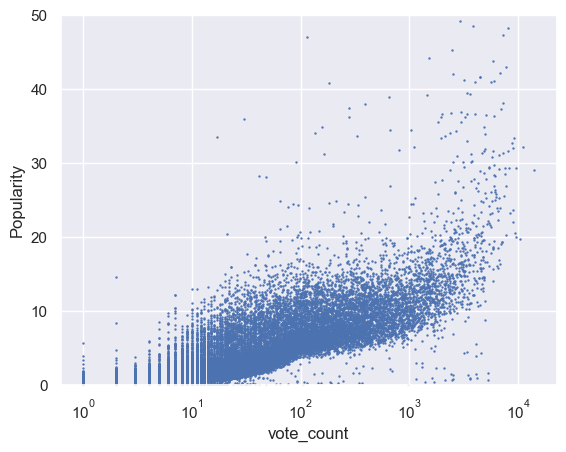

In [17]:
sns.set()
plt.scatter(eda_data['vote_count'], eda_data['popularity'], s = 0.5, )

plt.xlabel('vote_count')
plt.xscale('log')

plt.ylabel('Popularity')
plt.ylim(0, 50)

Let's keep the movies which popularity and vote_count are greater than 10

In [18]:
data.drop(data[(eda_data['popularity'] < 10) & (eda_data['vote_count'] < 10)].index, inplace=True)

Seeing that there is only 2 instances with a vote_count smaller than 10 our y axis will start there

In [19]:
# eda_data[eda_data['vote_count'] < 10].value_counts().sum()

Now let's examine the distribution between vote_average and vote_count

Text(0.5, 0, 'vote_average')

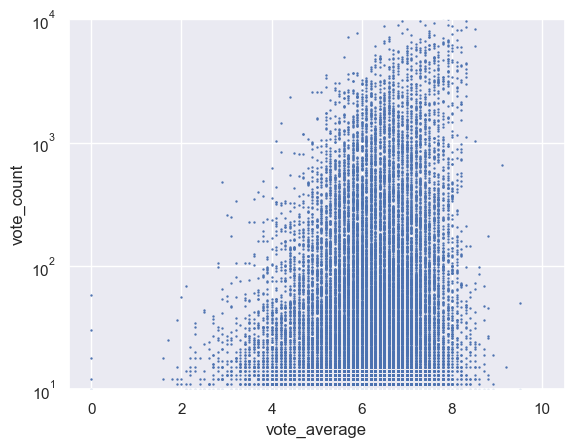

In [20]:
sns.set()
plt.scatter(eda_data['vote_average'], eda_data['vote_count'], s = 0.5, )
plt.ylim(10,10000)

plt.ylabel('vote_count')
plt.yscale('log')

plt.xlabel('vote_average')

For recommendations we will keep the data with a vote average greater or equal to 5 and a vote count greater than 50

In [21]:
data.drop(data[(data['vote_average'] <= 5) & (data['vote_count'] <= 50)].index, inplace= True)

The features that we are going to use finally in our model are: Director, prod_companies and genres_list

In [22]:
data[['id','title', 'directors', 'genres_list', 'prod_companies', 'vote_average']].to_csv('_src/data/model_data.csv', index=False)